<a href="https://colab.research.google.com/github/anjalipatel101/481_Project_Fall_2023/blob/testbranch/good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

In [ ]:
!pip install opendatasets
!pip install pandas

In [3]:
!pip install -q kaggle


!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download imsparsh/animal-breed-cats-and-dogs

 99% 748M/753M [00:25<00:00, 28.0MB/s]
100% 753M/753M [00:25<00:00, 31.4MB/s]


In [ ]:
!unzip animal-breed-cats-and-dogs.zip

In [146]:
import pathlib
import os
import imghdr
#data_dir = '/content/animal-breed-cats-and-dogs'

In [159]:
import numpy as np
import pandas as pd
import os

In [160]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [163]:
train_path = '/content/data_dir/TRAIN'
test_path = '/content/data_dir/TEST'

In [165]:
## Get list of class names ##
files = os.listdir(train_path)
files.sort()  # Sort the list of filenames

print(files)
print(len(files))

['abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'bengal', 'birman', 'bombay', 'boxer', 'british_shorthair', 'chihuahua', 'egyptian_mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher', 'newfoundland', 'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'siamese', 'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
## IDETIFYING THE TRAINING DATASET ##
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

OLD TEST

In [15]:
## Converting categorical labels into numerical values ##

mapping={ 'basset_hound':0, 'beagle':1, 'russian_blue':2, 'pomeranian':3, 'ragdoll':4,
         'staffordshire_bull_terrier':5, 'keeshond':6, 'siamese':7, 'pug':8, 'shiba_inu':9,
         'american_pit_bull_terrier':10, 'bengal':11, 'british_shorthair':12, 'newfoundland':13,
         'havanese':14, 'japanese_chin':15, 'german_shorthaired':16, 'birman':17, 'maine_coon':18,
         'english_cocker_spaniel':19, 'scottish_terrier':20, 'wheaten_terrier':21, 'chihuahua':22,
         'american_bulldog':23, 'abyssinian':24, 'boxer':25, 'yorkshire_terrier':26, 'miniature_pinscher':27,
         'sphynx':28, 'samoyed':29, 'leonberger':30, 'bombay':31, 'english_setter':32, 'persian':33,
         'great_pyrenees':34, 'egyptian_mau':35, 'saint_bernard':36 }

In [ ]:
'''
dataset=[]
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])
    count=count+1
'''

In [16]:
#Loading images the directory to where each subdirectory represents
# the breed type (class) and contains images corresponding to that class
import os
import random
from keras.preprocessing.image import load_img, img_to_array

dataset = []
count = 0

for class_name in os.listdir(directory):
    class_path = os.path.join(directory, class_name)

    for im in os.listdir(class_path):
        image_path = os.path.join(class_path, im)
        image = load_img(image_path, grayscale=False, color_mode='rgb', target_size=(180, 180))
        image = img_to_array(image)
        image = image / 255.0
        dataset.append([image, count])

    count += 1

# Shuffle the dataset
random.shuffle(dataset)


In [17]:
'''
test=[] # List to store test images
testfile=[] # List to store test file names

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    image=load_img(path, grayscale=False, color_mode='rgb', target_size=(180,180))
    image=img_to_array(image)
    image=image/255.0 # Normalize pixel values
    test+=[image]
    testfile+=[file]
'''
test = []  # List to store test images
testfile = []  # List to store test file names

for file in os.listdir(directory2):
    path = os.path.join(directory2, file)
    image = load_img(path, grayscale=False, color_mode='rgb', target_size=(180, 180))
    image = img_to_array(image)
    image = image / 255.0  # Normalize pixel values
    test.append(image)
    testfile.append(file)


In [18]:
data,labels0=zip(*dataset) # unpack image data array and labels

In [19]:
labels1=to_categorical(labels0) # one-hot encoding numercial -> categorcial
labels=np.array(labels1)

In [20]:
# Convert data into NumPy arrays
data=np.array(data)
test=np.array(test)

In [21]:
# Reshape arrays into 4D array
data2=data.reshape(-1,180,180,3)
test2=test.reshape(-1,180,180,3)

In [22]:
# Split the dataset into training and testing sets for data & labels
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4712, 180, 180, 3)
(1178, 180, 180, 3)
(4712, 37)
(1178, 37)


In [23]:
# Produce variations of the original images based on specific transformations

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [24]:
# DenseNet121 Keras model initialized with pre-trained ImageNet weights, with its layers frozen

model = tf.keras.applications.DenseNet121(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
model.trainable = False

29084464/29084464 [==============================] - 2s 0us/step


In [25]:
# New layers are appended for further feature extraction and classification
inputs3 = model.input
x3 = tf.keras.layers.Dense(128, activation='relu')(model.output)
outputs3 = tf.keras.layers.Dense(37, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20
148/148 [==============================] - 681s 5s/step - loss: 2.2251 - accuracy: 0.3899 - val_loss: 0.7941 - val_accuracy: 0.7572
Epoch 2/20
148/148 [==============================] - 659s 4s/step - loss: 1.2382 - accuracy: 0.6231 - val_loss: 0.5897 - val_accuracy: 0.8073
Epoch 3/20
148/148 [==============================] - 652s 4s/step - loss: 1.0423 - accuracy: 0.6757 - val_loss: 0.5214 - val_accuracy: 0.8345
Epoch 4/20
148/148 [==============================] - 663s 4s/step - loss: 0.9546 - accuracy: 0.7022 - val_loss: 0.4893 - val_accuracy: 0.8413
Epoch 5/20
148/148 [==============================] - 668s 5s/step - loss: 0.8881 - accuracy: 0.7194 - val_loss: 0.4936 - val_accuracy: 0.8302
Epoch 6/20
148/148 [==============================] - 675s 5s/step - loss: 0.8766 - accuracy: 0.7264 - val_loss: 0.4681 - val_accuracy: 0.8311
Epoch 7/20
148/148 [==============================] - 675s 5s/step - loss: 0.7977 - accuracy: 0.7475 - val_loss: 0.4616 - val_accuracy: 0.8523

In [40]:
model.save('his.keras')

In [28]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

37/37 [==============================] - 126s 3s/step
              precision    recall  f1-score   support

           0       0.51      0.80      0.62        35
           1       0.84      0.88      0.86        24
           2       0.80      0.91      0.85        43
           3       0.90      0.64      0.75        28
           4       0.91      1.00      0.95        30
           5       0.78      0.89      0.83        28
           6       0.74      0.88      0.81        26
           7       1.00      0.89      0.94        27
           8       0.90      0.90      0.90        31
           9       0.84      0.79      0.81        33
          10       0.83      0.87      0.85        23
          11       0.88      0.88      0.88        26
          12       0.78      0.64      0.70        33
          13       0.85      0.98      0.91        41
          14       0.94      0.94      0.94        35
          15       0.94      0.91      0.92        33
          16       1.00    

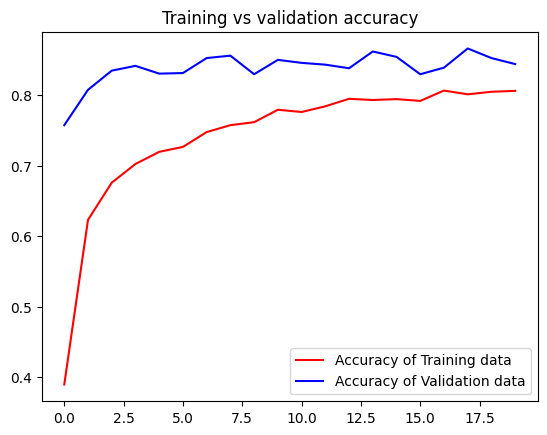

<Figure size 640x480 with 0 Axes>

In [29]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

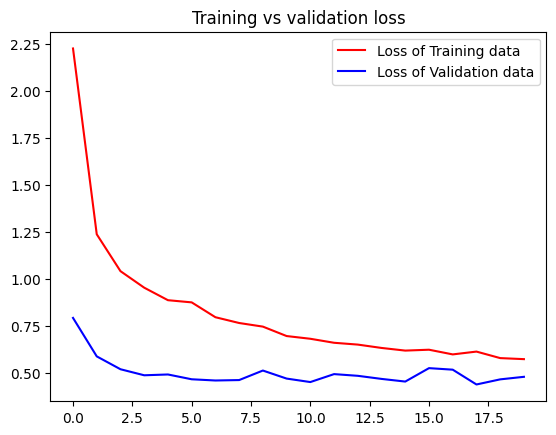

<Figure size 640x480 with 0 Axes>

In [123]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

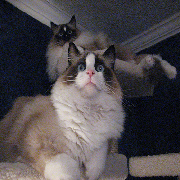

In [154]:
load_img("/content/data_dir/TEST/102.jpg",target_size=(180,180))

In [155]:
from tensorflow.keras.preprocessing import image as keras_image

image_height = 180
image_width = 180

# Load the image using the file path
image_path = '/content/data_dir/TEST/102.jpg'
img = keras_image.load_img(image_path, target_size=(image_height, image_width))  # Specify your image dimensions



In [156]:
# Convert the image to a NumPy array
img_array = keras_image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image

# Expand dimensions to match the model's expected input shape
prediction_image = np.expand_dims(img_array, axis=0)

In [157]:
prediction = model.predict(prediction_image)
predicted_class = np.argmax(prediction)
predicted_class_name = mapper(predicted_class)
print("Predicted class: {}".format(predicted_class_name))

1/1 [==============================] - 0s 206ms/step
Predicted class: sphynx


In [94]:
'''
reverse_mapping={  0:'basset_hound', 1:'beagle', 2:'russian_blue', 3:'pomeranian', 4:'ragdoll',
         5:'staffordshire_bull_terrier', 6:'keeshond', 7:'siamese', 8:'pug', 9:'shiba_inu',
         10:'american_pit_bull_terrier', 11:'bengal', 12:'british_shorthair', 13:'newfoundland',
         14:'havanese', 15:'japanese_chin', 16:'german_shorthaired', 17:'birman', 18:'maine_coon',
         19:'english_cocker_spaniel', 20:'scottish_terrier', 21:'wheaten_terrier', 22:'chihuahua',
         23:'american_bulldog', 24:'abyssinian', 25:'boxer', 26:'yorkshire_terrier', 27:'miniature_pinscher',
         28:'sphynx', 29:'samoyed', 30:'leonberger', 31:'bombay', 32:'english_setter', 33:'persian',
         34:'great_pyrenees', 35:'egyptian_mau', 36:'saint_bernard' }

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))


# Perform the prediction using the model
prediction = model.predict(prediction_image)
predicted_class = np.argmax(prediction)

def mapper(value):
    return reverse_mapping[value]

predicted_class_name = mapper(predicted_class)
print("Predicted class: {}".format(predicted_class_name))
'''

1/1 [==============================] - 0s 200ms/step
Predicted class: basset_hound


37/37 [==============================] - 121s 3s/step


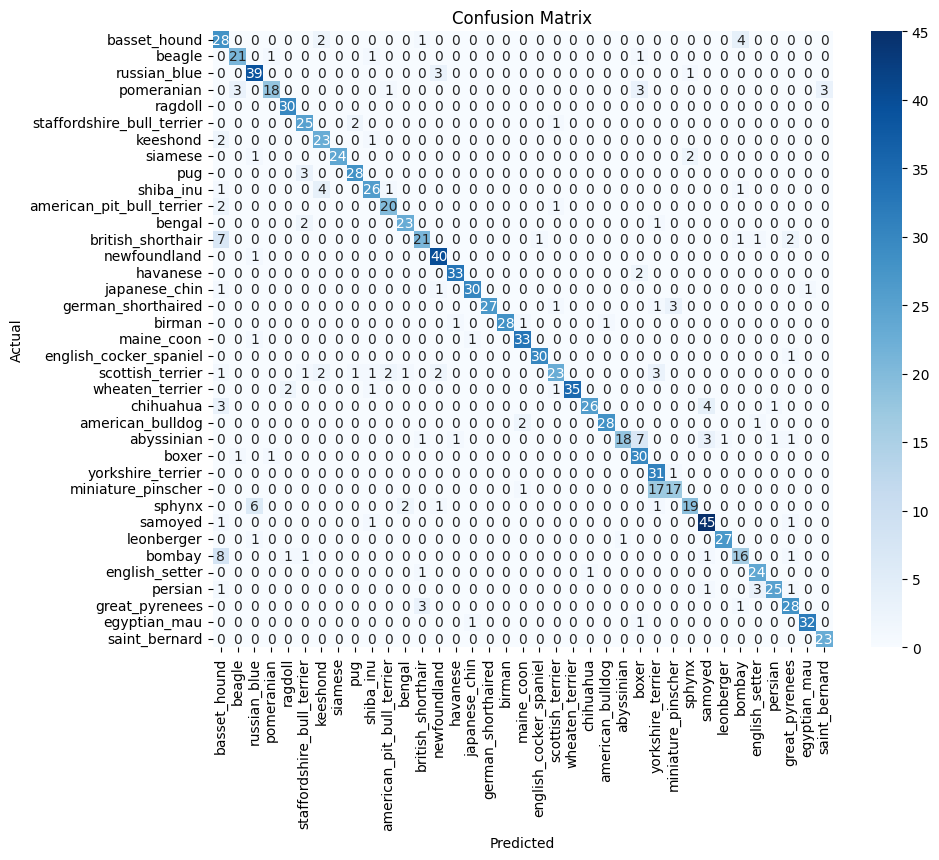

              precision    recall  f1-score   support

           0       0.51      0.80      0.62        35
           1       0.84      0.88      0.86        24
           2       0.80      0.91      0.85        43
           3       0.90      0.64      0.75        28
           4       0.91      1.00      0.95        30
           5       0.78      0.89      0.83        28
           6       0.74      0.88      0.81        26
           7       1.00      0.89      0.94        27
           8       0.90      0.90      0.90        31
           9       0.84      0.79      0.81        33
          10       0.83      0.87      0.85        23
          11       0.88      0.88      0.88        26
          12       0.78      0.64      0.70        33
          13       0.85      0.98      0.91        41
          14       0.94      0.94      0.94        35
          15       0.94      0.91      0.92        33
          16       1.00      0.84      0.92        32
          17       1.00    

In [117]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already predicted the classes using your model:
y_pred = model.predict(testx)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(testy, axis=1)

# Generating confusion matrix
conf_matrix = confusion_matrix(ground, pred)

# Displaying the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=reverse_mapping.values(),
            yticklabels=reverse_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Displaying classification report
print(classification_report(ground, pred))

In [132]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

pred2=[]
for item in prediction2:
    value2=np.argmax(item)
    move_name2=mapper(value2)
    pred2+=[move_name2]

(1500, 180, 180, 3)
47/47 [==============================] - 151s 3s/step
(1500, 37)


In [133]:
print(testfile[0:3])
print(pred2[0:3])
print(len(testfile))
print(len(pred2))

['352.jpg', '1103.jpg', '1485.jpg']
['russian_blue', 'yorkshire_terrier', 'staffordshire_bull_terrier']
1500
1500


In [134]:
numbers=[]
for item in testfile:
    s=item[0:-4]
    numbers+=[int(s)]

In [135]:
result = pd.DataFrame(testfile)
result[1] = pred2
result[2] = numbers
result.columns = ['Filename','Class','Numbers']
print(result)

      Filename                       Class  Numbers
0      352.jpg                russian_blue      352
1     1103.jpg           yorkshire_terrier     1103
2     1485.jpg  staffordshire_bull_terrier     1485
3      976.jpg                newfoundland      976
4     1085.jpg                     persian     1085
...        ...                         ...      ...
1495  1182.jpg      english_cocker_spaniel     1182
1496   617.jpg                      beagle      617
1497  1166.jpg                   shiba_inu     1166
1498   340.jpg   american_pit_bull_terrier      340
1499   834.jpg           british_shorthair      834

[1500 rows x 3 columns]


In [136]:
result2=result.sort_values('Numbers').reset_index(drop=True)
result3=result2.drop('Numbers',axis=1)
print(result3)

      Filename               Class
0        1.jpg        basset_hound
1        2.jpg      great_pyrenees
2        3.jpg       japanese_chin
3        4.jpg  german_shorthaired
4        5.jpg   yorkshire_terrier
...        ...                 ...
1495  1496.jpg          maine_coon
1496  1497.jpg           chihuahua
1497  1498.jpg                 pug
1498  1499.jpg    american_bulldog
1499  1500.jpg               boxer

[1500 rows x 2 columns]
